Ноутбук 1.3. Множественная регрессия про провинции.

In [ ]:
import numpy as np # математические операции
import pandas as pd # операции с табличками
import statsmodels.formula.api as smf # модели 
from sklearn.linear_model import LinearRegression # линейная регрессия без статистики
import seaborn as sns # графики
import matplotlib.pyplot as plt # графики

In [ ]:
!pip install rdatasets # наборы данных
from rdatasets import data 

In [ ]:
swiss = data('swiss')

In [ ]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6


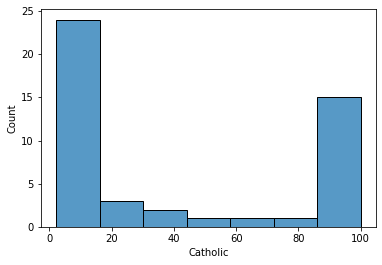

In [ ]:
sns.histplot(data=swiss, x='Catholic')

In [ ]:
mod_0 = smf.ols('Fertility ~ Agriculture + Catholic + Education', data=swiss)
fit_0 = mod_0.fit()

In [ ]:
fit_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     25.73
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           1.09e-09
Time:                        10:56:42   Log-Likelihood:                -160.71
No. Observations:                  47   AIC:                             329.4
Df Residuals:                      43   BIC:                             336.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      86.2250      4.735     18.211      0.000      76.677      95.773
Agriculture    -0.2030      0.071     -2.854      0.007      -0.347      -0.060
Catholic        0.1452      0.030      4.817      0.000       0.084       0.206
Education      -1.0721      0.156     -6.881      0.000      -1.386      -0.758
==============================================================================
Omnibus:                        2.226   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.379
Skew:                           0.111   Prob(JB):                        0.502
Kurtosis:                       2.191   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
new = pd.DataFrame({'Agriculture': [50], 'Catholic': [50], 'Education': [20]})
new

,Agriculture,Catholic,Education
0,50,50,20


In [ ]:
fit_0.predict(new)

0    61.890266
dtype: float64

In [ ]:
new['y_hat'] = fit_0.predict(new)
new

,Agriculture,Catholic,Education,y_hat
0,50,50,20,61.890266


In [ ]:
swiss['y_hat'] = fit_0.predict(swiss)

In [ ]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,y_hat
0,80.2,17.0,15,12,9.96,22.2,71.353823
1,83.1,45.1,6,9,84.84,22.2,79.737581
2,92.5,39.7,5,5,93.40,20.2,86.365495
3,85.8,36.5,12,7,33.77,20.3,76.212566
4,76.9,43.5,17,15,5.16,20.6,62.059917


In [ ]:
swiss[['Fertility', 'y_hat']].corr()

,Fertility,y_hat
Fertility,1.000000,0.801408
y_hat,0.801408,1.000000
